In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv ('train.csv')

In [3]:
submission = pd.read_csv ('sample_submission.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
submission.head(5)

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [7]:
test.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
#agregamos columna con numero de palabras de cada tweet
train['number_of_words'] = train['text'].str.count('') + 1

In [9]:
train.head(5)

,id,keyword,location,text,target,number_of_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,71
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,40
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,135
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,67
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,90


In [15]:
#nuevo df con tweets referenciados a desastres reales
real_disaster_tweets = train[train['target']==1]
real_disaster_tweets.head(5)

,id,keyword,location,text,target,number_of_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,71
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,40
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,135
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,67
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,90


In [16]:
#info gneral sobre real_disaster_tweets
real_disaster_tweets.describe()

,id,target,number_of_words
count,3271.000000,3271.0,3271.000000
mean,5661.608071,1.0,110.113421
std,3097.094809,0.0,29.309854
min,1.000000,1.0,16.000000
25%,3104.500000,1.0,90.000000
50%,5676.000000,1.0,117.000000
75%,8252.000000,1.0,138.000000
max,10873.000000,1.0,153.000000


In [17]:
#nuevo df con tweets referenciados a desastres falsos o neutrales
fake_disaster_tweets = train[train['target']==0]
fake_disaster_tweets.head(5)

,id,keyword,location,text,target,number_of_words
15,23,NaN,NaN,What's up man?,0,16
16,24,NaN,NaN,I love fruits,0,15
17,25,NaN,NaN,Summer is lovely,0,18
18,26,NaN,NaN,My car is so fast,0,19
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,30


In [18]:
#info gneral sobre fake_disaster_tweets
fake_disaster_tweets.describe()

,id,target,number_of_words
count,4342.000000,4342.0,4342.000000
mean,5276.446338,0.0,97.706817
std,3157.206802,0.0,35.885924
min,23.000000,0.0,9.000000
25%,2513.250000,0.0,70.000000
50%,5243.500000,0.0,103.000000
75%,8038.500000,0.0,132.000000
max,10848.000000,0.0,159.000000


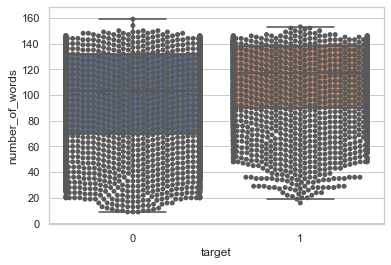

In [19]:
#patron de distribucion de cada categoria
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
#train = sns.load_dataset("train")

ax = sns.boxplot(x="target", y="number_of_words", data=train, showfliers = False)
ax = sns.swarmplot(x="target", y="number_of_words", data=train, color='.35')

plt.show()